(200, 3)


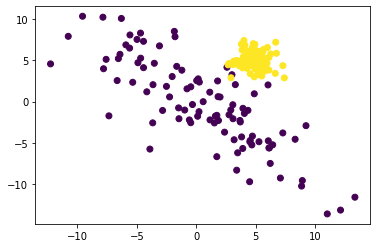

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors

def gen_points(x_mean, y_mean, x_sigma, y_sigma, x_y_cov, n_samples, cluster_number):
    ret = np.random.multivariate_normal([x_mean, y_mean],
                                        [[x_sigma ** 2, x_y_cov], [x_y_cov, y_sigma ** 2]],
                                        n_samples)
    return np.hstack((ret, np.repeat(cluster_number, n_samples).reshape(n_samples, 1)))



def plot_points(points):
    plt.scatter(points[:, 0], points[:, 1], c=points[:, 2])
    
points = np.vstack((gen_points(0, 0, 5, 5, -20, 100, 1),gen_points(5, 5, 1, 1, 0, 100, 2)))
print(points.shape)
plot_points(points)

In [2]:
from math import isnan
from random import sample
def hopkins(X):
  d = X.shape[1]
  #d = len(vars) # columns
  n = len(X) # rows
  m = int(0.1 * n)
  nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
  rand_X = sample(range(0, n, 1), m)
 
  ujd = []
  wjd = []
  for j in range(0, m):
     u_dist, _ = nbrs.kneighbors(np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
     ujd.append(u_dist[0][1])
     w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
     wjd.append(w_dist[0][1])
 
  H = sum(ujd) / (sum(ujd) + sum(wjd))
  if isnan(H):
     print(ujd, wjd)
     H = 0
 
  return H

0.8787360704078953

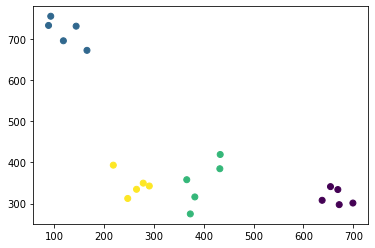

In [71]:
points = np.empty((0, 3))
for idx in range(4):
    sd = 30
    points = np.vstack((points, gen_points(random.randint(1, 800), random.randint(1, 800), sd, sd, 0, 5, idx)))
plot_points(points)
hopkins(points[:, :2])

In [68]:
import uuid
np.save(str(uuid.uuid4()) + ".npy", points, allow_pickle=False)

In [ ]:
# number of points in a stimulus
# number of clusters in a stimulus
# for each cluster
    # the variance of x
    # the variance of y
    # the covariance of x y